In [ ]:
# Utility: Preparation text

from contractions import CONTRACTION_MAP

##========== PREPARATION TEXT ===========##

# Contraction
def expand_contractions(sentence, contraction_mapping=CONTRACTION_MAP):
    """
    Expand the contractions in a sentence. For example don't => do not.
    
    Paramters:
    sentence (str): The input sentence to clean.
    contraction_mapping (dict): A dictionary for mapping contractions.
    
    
    Returns:
    str: The expanded contraction sentence.
    """
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    
    def expanded_match(contraction):
        """
        Filter for expanding the matched contraction.
        
        Parameters:
        contraction (str): The input of contraction
        
        Returns:
        str: The expanded contraction.
        """
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    
    expanded_sentence = contractions_pattern.sub(expanded_match, sentence)
    return expanded_sentence


def remove_extra_spaces(sentence):
    # Use regex to replace multiple spaces with a single space
    return re.sub(r'\s+', ' ', sentence).strip()


def remove_non_ascii(text):
    """
    Remove all non-ASCII characters from the text.

    Parameters:
    text (str): The input text to clean.

    Returns:
    str: The cleaned text with only ASCII characters.
    
    """
    
    return ''.join([char for char in text if ord(char) < 128])

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ast

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from wordcloud import WordCloud

from scipy.spatial.distance import pdist

In [7]:
df = pd.read_csv('example.csv')
# Convert the string columns to dictionaries
df['ability'] = df['ability'].apply(ast.literal_eval)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    91 non-null     int64 
 1   review   91 non-null     object
 2   ability  91 non-null     object
 3   aspects  91 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB
None


,index,review,ability,aspects
0,0,"The staff were incredibly helpful and patient,...","{0: [('staff', 'were patient'), ('staff', 'wer...","{'staff': ['staff were patient.', 'staff were ..."
1,1,I had a great experience purchasing my phone h...,"{0: [('process', 'was smooth'), ('process', 'w...","{'process': ['process was smooth.', 'process w..."
2,2,"Their selection of phones is amazing, and the ...","{0: [('price', 'are competitive'), ('selection...","{'price': ['price are competitive.'], 'selecti..."
3,3,I appreciate how the staff walked me through s...,"{0: [('I', 'appreciate walked me'), ('I', 'app...",{'new device': ['I appreciate walked through s...
4,4,"Great customer service, I left with the phone ...","{0: [('I', 'left with phone'), ('question', 'a...",{'question': ['question answered.']}


In [8]:
def contraction(x):
    flatten = [item for sublist in x.values() for item in sublist]

    temp = []
    for t in flatten:
        temp.append(' '.join(t))

    if len(temp) > 0:
        return '. '.join(temp) + '.'
    return ''
    
corpus = df['ability'].apply(contraction).values

corpus

array(['staff were patient. staff were helpful.',
       'process was smooth. process was quick.',
       'price are competitive. selection is amazing.',
       'I appreciate walked me. I appreciate walked through setting new device.',
       'I left with phone. question answered.',
       'I could not resist offer amazing deals on phones. I could not resist upgrading.',
       'technician fixed issue. technician fixed faster. I expected.',
       'experience really know stuff.',
       'variety was impressive. I found perfect case.',
       'staff was knowledgeable.', 'price were reasonable.',
       'staff really went mile.',
       'service service be Excellent. they helped find.',
       'deal was friendly. staff was friendly.',
       'I love store. fixing buying be experience. buying buying be experience.',
       'I got good deal on old phone.',
       'service are reliable. service are quick.',
       'staff was helpful in setting phone.', 'I m satisfied.',
       'staff was pa

In [17]:
# Step 1: Convert text data into a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)


# Step 2: Compute pairwise distances (cosine similarity)
distance_matrix = pdist(tfidf_matrix.toarray(), metric='cosine')

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

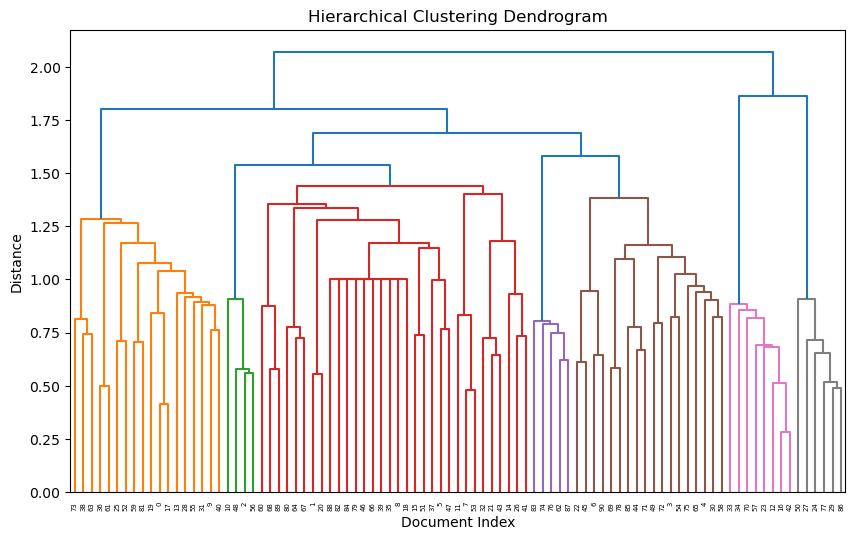

In [20]:
# Step 4: Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(corpus)))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.show()

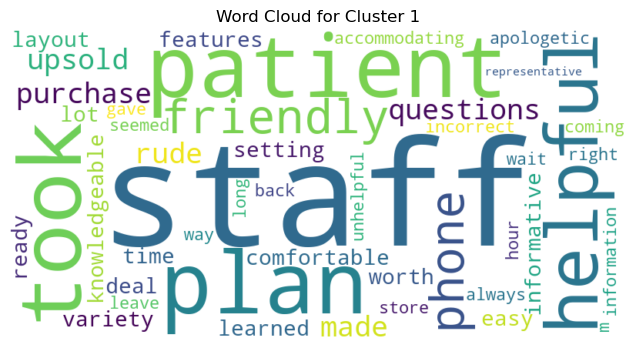

Cluster 1:
  - staff were patient. staff were helpful.
  - staff was knowledgeable.
  - deal was friendly. staff was friendly.
  - staff was helpful in setting phone.
  - staff was patient with questions. variety was patient with questions.
  - staff made. I was comfortable with purchase.
  - I learned lot about features. staff was informative.
  - staff are ready. layout is easy.
  - staff took time.
  - plan is worth.
  - staff was accommodating.
  - I made right purchase. I always leave store.
  - staff was not apologetic. I had to wait over hour.
  - staff was rude. I m not coming back. staff was unhelpful.
  - I had took way. I had took too long.
  - staff seemed. staff gave incorrect information about plan.
  - they upsold me. they upsold on plan.
  - representative were rude on phone.


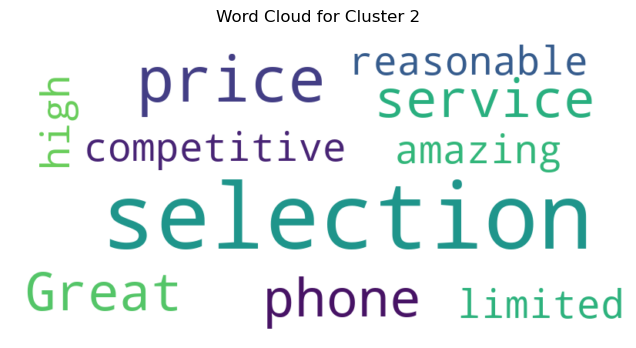

Cluster 2:
  - price are competitive. selection is amazing.
  - price were reasonable.
  - service selection be phone. selection selection be Great. service selection be Great. selection selection be phone.
  - selection is limited. price are high.


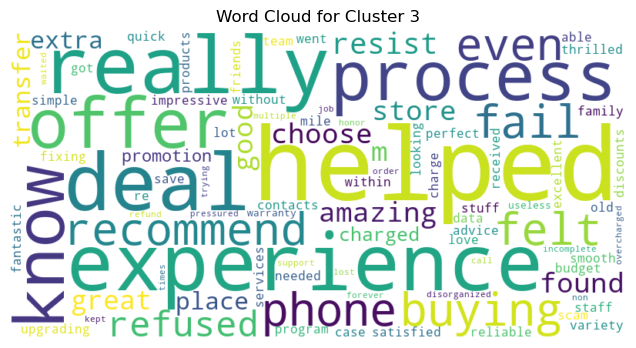

Cluster 3:
  - process was smooth. process was quick.
  - I could not resist offer amazing deals on phones. I could not resist upgrading.
  - experience really know stuff.
  - variety was impressive. I found perfect case.
  - staff really went mile.
  - I love store. fixing buying be experience. buying buying be experience.
  - I got good deal on old phone.
  - I m satisfied.
  - I m thrilled. process was simple.
  - they helped choose within budget. they helped choose phone.
  - they helped get great deal. I found needed what.
  - they helped save lot.
  - they not fail recommend to family. they not fail recommend store. they not fail recommend to friends.
  - place place be Amazing.
  - they were able.
  - I had great experience with program.
  - they even helped data. they even helped transfer contacts. they even helped transfer without extra charge.
  - this is reliable.
  - they offer fantastic promotions. they offer discounts.
  - you re looking for good deals.
  - they really kn

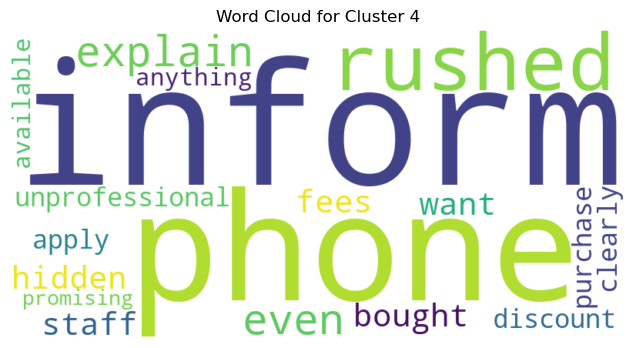

Cluster 4:
  - they did not inform me. I bought phone. they did not inform of hidden fees.
  - they did not want. staff was unprofessional.
  - they did not apply discount.
  - they rushed through purchase. they did not explain clearly. they did not explain anything. they rushed me.
  - it was available. they did not even have after promising me. they did not even have phone.


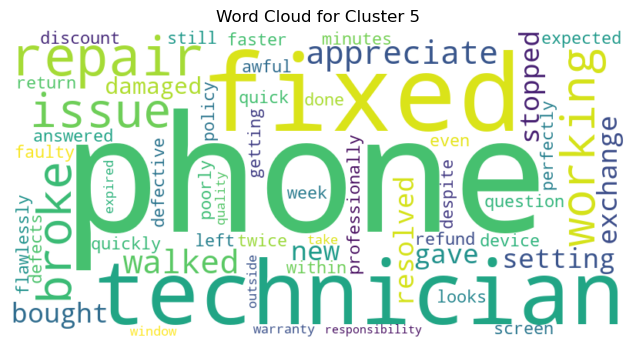

Cluster 5:
  - I appreciate walked me. I appreciate walked through setting new device.
  - I left with phone. question answered.
  - technician fixed issue. technician fixed faster. I expected.
  - phone was fixed in minutes.
  - they were quick in setting phone.
  - I bought from here. phone has working flawlessly. I bought it.
  - they even gave discount on repair. they fixed perfectly. they fixed screen.
  - they resolved very quickly professionally. they resolved issue.
  - phone looks new.
  - phone was defective.
  - they twice gave refund. I had to return faulty phone.
  - repair was done poorly. phone broke again. phone broke within week.
  - phone was working after repair.
  - phone still has same issue after getting.
  - I could not exchange despite defects. I could not exchange phone. policy is awful.
  - phone broke. warranty just expired.
  - phone stopped quality. phone stopped working outside window.
  - they did not take responsibility. technician damaged during repair.

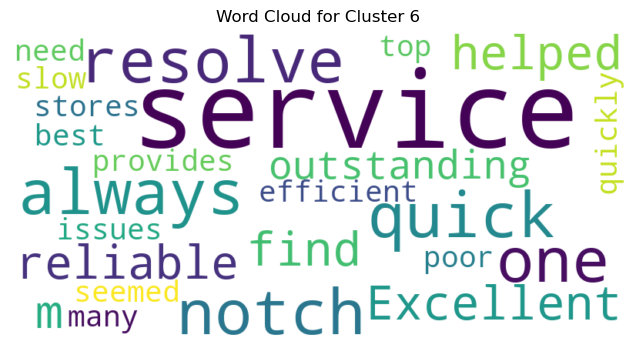

Cluster 6:
  - service service be Excellent. they helped find.
  - service are reliable. service are quick.
  - I m. service is outstanding.
  - one provides best service. I been to many stores.
  - service is notch. they always resolve issues. they always resolve quickly. service is top notch.
  - service was efficient. service was quick.
  - one seemed. service is poor.
  - they need. service was slow.


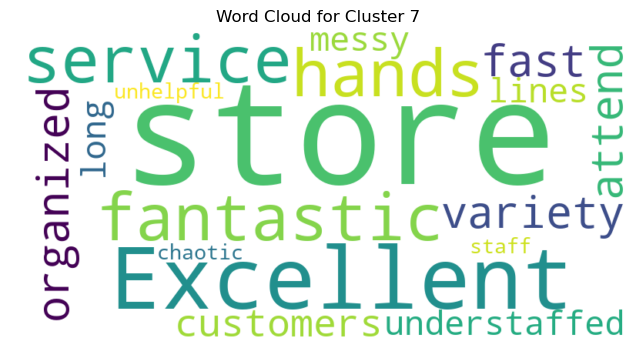

Cluster 7:
  - store hands.
  - store has fantastic service.
  - store store be Excellent. variety store be Excellent.
  - store is organized. they fast attend to customers.
  - store was understaffed. store was messy.
  - store was with long lines. store was with unhelpful staff. store was chaotic.


In [23]:
# Step 5: Extract clusters
# Create 3 clusters
clusters = fcluster(linkage_matrix, t=7, criterion='maxclust')

# Step 6: Generate word clouds for each cluster
for cluster_id in np.unique(clusters):
    cluster_docs = [corpus[i] for i in range(len(corpus)) if clusters[i] == cluster_id]
    
    # Combine all documents in the cluster
    combined_text = " ".join(cluster_docs)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()

    # Print cluster documents
    print(f"Cluster {cluster_id}:")
    for doc in cluster_docs:
        print(f"  - {doc}")